<h1 align='center'>Um <i>tour</i> pelos classificadores de <i>Machine Learning</i> usando <i>Scikit-Learn</i></h1>
<p align='center'><img src=https://i0.wp.com/www.datageeks.com.br/wp-content/uploads/2019/06/Machine-Learning.jpg?fit=900%2C600&ssl=1 heigth=350 width=600></p>
<p align='justify'>Faremos um <i>tour</i> por uma seleção de algoritmos de aprendizado de máquina populares e poderosos que são comumente usados na academia e na indústria. Ao aprender sobre as diferenças entre vários algoritmos de aprendizado supervisionado para classificação, também desenvolveremos uma apreciação de seus pontos fortes e fracos individuais. Além disso, daremos nossos primeiros passos com a biblioteca <i>scikit-learn</i>, que oferece uma <i>interface</i> amigável e consistente para usar esses algoritmos de forma eficiente e produtiva.</p>

<h2>Escolhendo um algoritmo de classificação</h2>
<p align='justify'>Escolher um algoritmo de classificação apropriado para uma tarefa de problema específica requer <b>prática e experiência</b>, cada algoritmo tem suas próprias peculiaridades e é baseado em certas suposições.</p>
<p align='justify'>Na prática, é sempre recomendável comparar o desempenho de pelo menos 3 ou 4 algoritmos de aprendizagem diferentes para selecionar o melhor modelo para o problema específico. Eles podem diferir no número de recursos ou exemplos, na quantidade de ruído em um conjunto de dados e se as classes são linearmente separáveis ou não.</p>

<p align='justify'>Eventualmente, o desempenho de um classificador em termos de performance computacional bem como o seu poder preditivo, depende muito dos dados subjacentes que estão disponíveis para o aprendizado. As cinco principais etapas envolvidas no treinamento, de acordo com <i>Sebastian Raschkal</i>, de um algoritmo de aprendizado de máquina supervisionado podem ser resumidas da seguinte forma:</p>
<ol>
<li>Selecionando recursos e coletando exemplos de treinamento rotulados.</li>
<li>Escolhendo uma métrica de desempenho.</li>
<li>Escolha de um classificador e algoritmo de otimização.</li>
<li>Avaliação do desempenho do modelo.</li>
<li>Ajustando o algoritmo.</li>
</ol>

<h2>Primeiros passos com scikit-learn – treinando um perceptron</h2>
<p align='justify'>Vamos dar uma olhada na API <i>scikit-learn</i>, que combina uma interface amigável e consistente com uma implementação altamente otimizada de vários algoritmos de classificação. A biblioteca <i>scikit-learn</i> oferece não apenas uma grande variedade de algoritmos de aprendizado, mas também muitas funções convenientes para pré-processar dados e ajustar e avaliar nossos modelos.</p>
<p align='jsutify'>Para começar com a biblioteca <i>scikit-learn</i>, treinaremos um modelo <i>perceptron</i>. Para simplificar, usaremos o já familiar conjunto de dados Iris. Convenientemente, o conjunto de dados Iris já está disponível via <i>scikit-learn</i>, pois é um conjunto de dados simples e popular, frequentemente usado para testar e experimentar algoritmos.</p> 

In [1]:
from sklearn import datasets
import numpy as np

# Carregando o dataset Iris 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))
# 0 = Iris Setosa 
# 1 = Iris Versicolor
# 2 = Iris Virgínica

Class labels: [0 1 2]


<p align='justify'>Embora muitas funções e métodos de classe do <i>scikit-learn</i> também funcionem com rótulos de classe em formato de <i>string</i>, o uso de rótulos inteiros é uma abordagem recomendada para evitar falhas técnicas e melhorar o desempenho computacional devido ao uso de memória menor; além disso, codificar rótulos de classe como inteiros é uma convenção comum entre a maioria das bibliotecas de aprendizado de máquina.</p>

In [2]:
# Dividindo os dados em 70% treinamento e 30% teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels count in y:', np.bincount(y))
print('Labels count in y_train:', np.bincount(y_train))
print('Labels count in y_test:', np.bincount(y_test))

Labels count in y: [50 50 50]
Labels count in y_train: [35 35 35]
Labels count in y_test: [15 15 15]


<p align='justify'>Aproveitamos o suporte integrado para estratificação via <i>stratify=y</i>. Nesse contexto, estratificação significa que o método <i>train_test_split</i> retorna subconjuntos de treinamento e teste que têm as mesmas proporções de rótulos de classe que o conjunto de dados de entrada.</p>

In [3]:
# Padronizando as Características (normalizando)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<p align='justify'>Observe que usamos os mesmos parâmetros de escala para padronizar o conjunto de dados de teste para que os valores no conjunto de dados de treinamento e de teste sejam comparáveis entre si.</p>

In [4]:
# Treinando o Perceptron via scikit-learn
from sklearn.linear_model import Perceptron


ppn = Perceptron(eta0=0.1, random_state=1) # Instanciando o modelo
ppn.fit(X_train_std, y_train) # Ajustando os dados

y_pred = ppn.predict(X_test_std) # Fazendo predições 
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [5]:
from sklearn.metrics import accuracy_score

# Avaliando a acurárcia do modelo
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred)) # Modo 1 usando o Accuracy_score
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))  # Modo 2 usando o score

Accuracy: 0.978
Accuracy: 0.978


<p align='justify'><b><i>Overfitting</i></b> significa que o modelo captura bem os padrões nos dados de treinamento, mas falha em generalizar bem para dados não vistos.</p>

In [6]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    color=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')
        else:
            plt.scatter(X_test[:, 0],
                        X_test[:, 1],
                        c='none',
                        edgecolor='black',
                        alpha=1.0,
                        linewidth=1,
                        marker='o',
                        s=100, 
                        label='test set')  

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


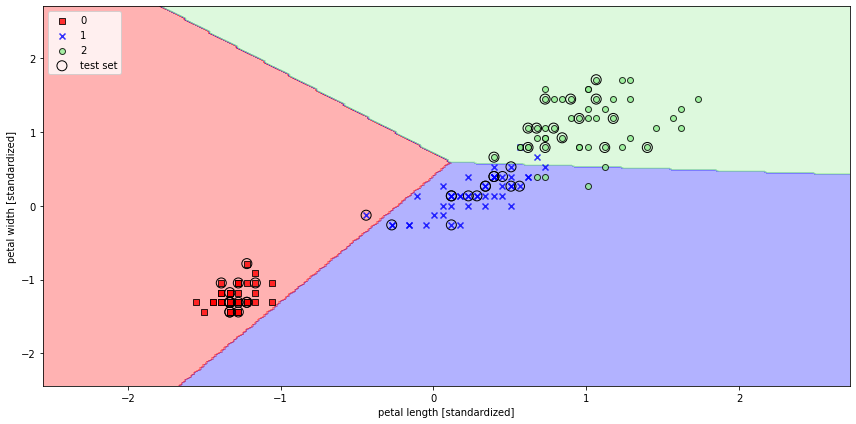

In [7]:
# Treinando um modelo perceptron usando os dados de treinamento padronizados:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plt.figure(figsize=(12,6))
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()

plt.show()

<p align='justify'>Lembrar que o algoritmo <i>perceptron</i> nunca converge em conjuntos de dados que não são perfeitamente separáveis linearmente, razão pela qual o uso do algoritmo <i>perceptron</i> normalmente não é recomendado na prática.</p>

<h2>Modelando probabilidades de classe por meio de regressão logística</h2>
<p align='justify'>Embora a regra do perceptron ofereça uma introdução agradável e fácil aos algoritmos de aprendizado de máquina para classificação, sua maior desvantagem é que ela nunca converge se as classes não forem perfeitamente separáveis linearmente. A tarefa de classificação feita anteriormente seria um exemplo de tal cenário. A razão para isso é que os pesos estão sendo continuamente atualizados, pois sempre há pelo menos um exemplo de treinamento mal classificado presente em cada época. Claro que podemos alterar a taxa de aprendizado e aumentar o número de épocas, mas a ressalva é que o <i>perceptron</i> nunca convergirá neste conjunto de dados.</p>
<p align='justify'>Para aproveitar melhor nosso tempo, vamos agora dar uma olhada em outro algoritmo simples, porém mais poderoso, para problemas de classificação linear e binária: <b>regressão logística</b>. Observe que, apesar do nome, a regressão logística é um modelo de classificação, não de regressão.</p>

<h3>Regressão logística e probabilidades condicionais</h3>
<p align='justify'>A regressão logística é um modelo de classificação muito fácil de implementar e funciona muito bem em classes linearmente separáveis. É um dos algoritmos mais utilizados para classificação na indústria.</p>
<p align='justify'>A regressão logística é usada na previsão do tempo, por exemplo, não apenas para prever se choverá em um determinado dia, mas também para relatar a chance de chuva. Da mesma forma, a regressão logística pode ser usada para prever a chance de um paciente ter uma determinada doença devido a certos sintomas, razão pela qual a regressão logística goza de grande popularidade no campo da medicina.</p>

<h3>Treinando um modelo de regressão logística com scikit-learn</h3>
<p align='justify'>Vamos aprender como usar a implementação mais otimizada de regressão logística do <i>scikit-learn</i>, que também suporta configurações multiclasse prontas para uso. Observe que em versões recentes do <i>scikit-learn</i>, a técnica usada para classificação multiclasse, multinomial ou OvR, é escolhida automaticamente.</p>
<p align="justify">Além disso, definimos <i>multi_class='ovr'</i> para fins de ilustração. Você pode querer comparar os resultados com <i>multi_class='multinomial'</i>. Observe que a configuração multinomial geralmente é recomendada na prática para <b>classes mutuamente exclusivas</b>, como aquelas encontradas no conjunto de dados Iris. Aqui, "mutuamente exclusivo" significa que cada exemplo de treinamento só pode pertencer a uma única classe (em contraste com a classificação multirrótulo, onde um exemplo de treinamento pode ser membro de várias classes).</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


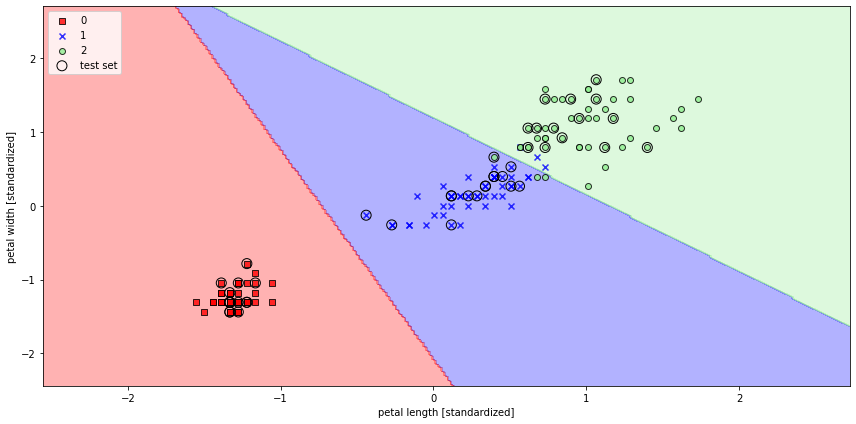

In [8]:
from sklearn.linear_model import LogisticRegression

# Instanciando o modelo.
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

# Treinando os Dados
lr.fit(X_train_std, y_train)

# Plotando os dados
plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='jsustify'>Observe que existem muitos algoritmos de otimização diferentes para resolver problemas de otimização. Para minimizar as funções de perda convexa, como a perda na regressão logística, recomenda-se usar abordagens mais avançadas do que o <i>Gradient Descent</i> estocástico regular (SGD). Na verdade, o <i>scikit-learn</i> implementa toda uma gama de tais algoritmos de otimização, que podem ser especificados através do parâmetro <i>solver</i>, a saber, <i>'newton-cg', 'lbfgs', 'liblinear', 'sag' e 'saga'</i>.</p>

<p align='justify'>A probabilidade de que os exemplos de treinamento pertençam a uma determinada classe pode ser calculada usando o método <i>predict_proba</i>. Por exemplo, podemos prever as probabilidades dos três primeiros exemplos no conjunto de dados de teste da seguinte forma:</p>

In [9]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [10]:
# A Soma da linha será sempre 1. Que seria igual a 100%.
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [11]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

<p align='justify'>No exemplo de código anterior, calculamos as probabilidades condicionais e as convertemos em rótulos de classe manualmente usando a função <i>argmax</i> do <i>NumPy</i>. Na prática, a maneira mais conveniente de obter rótulos de classe ao usar o <i>scikit-learn</i> é chamar o método de previsão diretamente:</p>

In [12]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

<p align='justify'>Por fim, uma palavra de cautela se você quiser prever o rótulo de classe de um único exemplo de flor: O <i>scikit-learn</i> espera um array bidimensional como entrada de dados; portanto, primeiro temos que converter uma única fatia de linha em tal formato. Uma maneira de converter uma única entrada de linha em uma matriz de dados bidimensional é usar o método <i>reshape</i> do <i>NumPy</i> para adicionar uma nova dimensão, como demonstrado aqui:</p>

In [13]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

<h3>Combatendo o overfitting via regularização</h3>
<p align='justify'>O <i>overfitting</i> é um problema comum em aprendizado de máquina, onde um modelo funciona bem em dados de treinamento, mas não generaliza bem para dados não vistos (dados de teste). Se um modelo sofre de <i>overfitting</i>, também dizemos que o modelo tem uma alta variância, que pode ser causada por ter muitos parâmetros, levando a um modelo muito complexo devido aos dados subjacentes. Da mesma forma, nosso modelo também pode sofrer de <i>underfitting</i> (alto viés), o que significa que nosso modelo não é complexo o suficiente para capturar bem o padrão nos dados de treinamento e, portanto, também sofre de baixo desempenho em dados não vistos.</p>

<h4>O tradeoff viés-variância</h4>
<p align='justify'>Freqüentemente, os pesquisadores usam os termos "viés" e "variância" ou "compensação de viés-variância" para descrever o desempenho de um modelo - ou seja, você pode tropeçar em palestras, livros ou artigos em que as pessoas dizem que um modelo tem um " alta variância" ou "alto viés". Então, o que isso significa? Em geral, podemos dizer que "alta variância" é proporcional ao <i>overfitting</i> e "alto viés" é proporcional ao <i>underfitting</i>.</p>
<p align='justify'>No contexto de modelos de aprendizado de máquina, a variância mede a consistência (ou variabilidade) da previsão do modelo para classificar um exemplo específico se treinarmos novamente o modelo várias vezes, por exemplo, em diferentes subconjuntos do conjunto de dados de treinamento. Podemos dizer que o modelo é sensível à aleatoriedade nos dados de treinamento. Em contraste, o viés mede o quão longe as previsões estão dos valores corretos, em geral, se reconstruirmos o modelo várias vezes em diferentes conjuntos de dados de treinamento; viés é a medida do erro sistemático que não é devido à aleatoriedade.</p>

<p align=justify'>Um forma de encontrar um bom viés-variância é ajustar a complexidade o modelo via regularização. A regularização é util para lidar com a famosa colinearidade, em outras palavras, alta correlação entre as <i>features</i>, filtrando os ruídos dos dados e eventualmente prevenindo o <i>overfitting</i>.

<h4>Regularização e Normalização de Recursos</h4>
<p align='justify'>A regularização é outra razão pela qual o dimensionamento de recursos, como a padronização, é importante. Para que a regularização funcione corretamente, precisamos garantir que todos os nossos recursos estejam em escalas comparáveis.</p>

<h3>Classificação máxima de margem com máquinas de vetor de suporte (SVM)</h3>
<p align='justify'>Outro algoritmo de aprendizado poderoso e amplamente utilizado é o <i>Support Vector Machine</i> (SVM), que pode ser considerada uma extensão do <i>perceptron</i>. Usando o algoritmo <i>perceptron</i>, minimizamos os erros de classificação. No entanto, nos SVMs o nosso objetivo de otimização é maximizar a margem. A margem é definida como a distância entre o hiperplano de separação (limite de decisão) e os exemplos de treinamento mais próximos deste hiperplano, que são os chamados vetores de suporte.</p>

<h4>Lidando com um caso não linearmente separável usando variáveis de folga</h4>
<p align='justify'>Embora não queiramos nos aprofundar muito nos conceitos matemáticos mais envolvidos por trás da classificação de margem máxima, vamos mencionar brevemente a variável de folga, 𝜉𝜉 , que foi introduzida por <i>Vladimir Vapnik</i> em 1995 e levou à chamada margem suave classificação. A motivação para a introdução da variável </i>slack</i> foi que as restrições lineares precisam ser relaxadas para dados não linearmente separáveis para permitir a convergência da otimização na presença de erros de classificação, sob a penalização de custo adequada.</p>

<p align='justify'>Por meio da variável C, podemos controlar a penalidade por classificação incorreta. Grandes valores de C correspondem a grandes penalidades de erro, enquanto somos menos rigorosos quanto a erros de classificação se escolhermos valores menores para C. Podemos então usar o parâmetro C para controlar a largura da margem e, portanto, ajustar a compensação entre viés e variância. Esse conceito está relacionado à regularização, que discutimos na seção anterior no contexto da regressão regularizada, onde diminuir o valor de C aumenta o viés e diminui a variância do modelo.</p>



C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


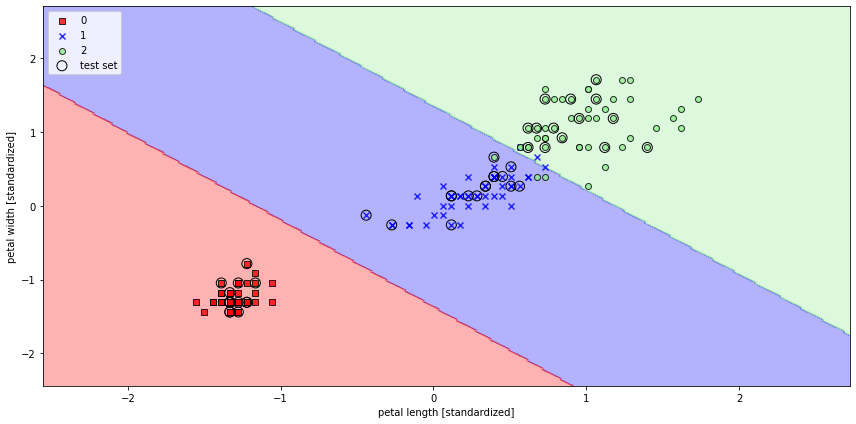

In [14]:
from sklearn.svm import SVC

# Instanciando um Modelo SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)

# Ajustando e treinando o Modelo
svm.fit(X_train_std, y_train)

# Plotando os dados

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<h4>Regressão logística versus SVMs</h4>

<p align='justify'>Em tarefas práticas de classificação, regressão logística linear e SVMs lineares geralmente produzem resultados muito semelhantes. A regressão logística tenta maximizar as probabilidades condicionais dos dados de treinamento, o que os torna mais propensos a <i>outliers</i> do que os SVMs, que se preocupam principalmente com os pontos mais próximos do limite de decisão (vetores de suporte). Por outro lado, a regressão logística tem a vantagem de ser um modelo mais simples e poder ser implementado com mais facilidade. Além disso, os modelos de regressão logística podem ser facilmente atualizados, o que é atraente quando se trabalha com dados de <i>streaming</i>.</p>

<h3>Implementações alternativas no <i>scikit-learn</i></h3>
<p align='justify'>A <i>scikit-learn</i> por intermédio da classe <i>LogisticRegression</i> implementa a <i>LIBLINEAR</i> e a classe <i>SVC</i> utiliza a <i>LIBSVM</i>. A vantagem de usar <i>LIBLINEAR</i> e <i>LIBSVM</i> sobre implementações nativas do <i>Python</i> é que elas permitem o treinamento extremamente rápido de grandes quantidades de classificadores lineares. No entanto, às vezes nossos conjuntos de dados são grandes demais para caber na memória do computador. Assim, o <i>scikit-learn</i> também oferece implementações alternativas por meio da classe <i>SGDClassifier</i>, que também oferece suporte ao aprendizado online por meio do método <i>partial_fit</i>.</p>

In [15]:
# Poderíamos iniciar o SGD na versão Perceptron, logistic regression e SVM com os seguintes parâmentros:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

<h3>Resolvendo problemas não lineares usando um SVM de kernel</h3>

<p align='justify'>Outra razão pela qual os SVMs desfrutam de alta popularidade entre os praticantes de aprendizado de máquina é que eles podem ser facilmente kernelizados para resolver problemas de classificação não linear. Antes de discutirmos o conceito principal por trás do chamado kernel SVM, a variante mais comum de SVMs, vamos primeiro criar um conjunto de dados sintético para ver como pode ser um problema de classificação não linear.</p>

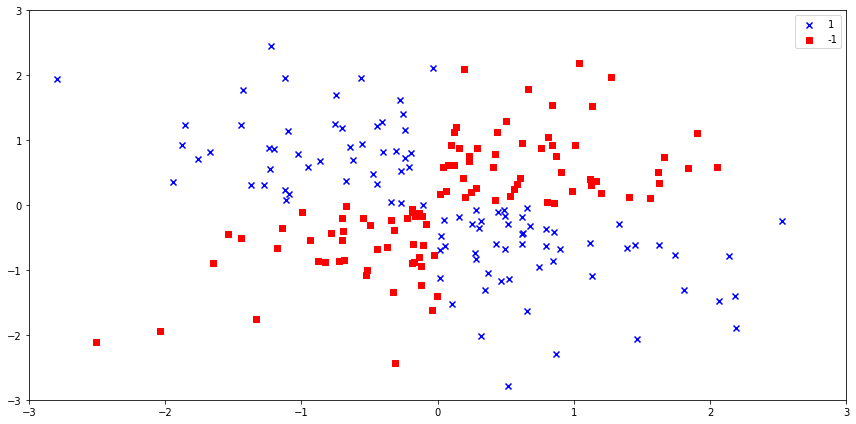

In [16]:
# Criando um conjunto de dados em formato XOR
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.figure(figsize=(12,6))
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

plt.show()

<p align='justify'>Claramente, vemos que não é possível separar os exemplos positivos e negativos usando um hiperplano linear, aplicando a regressão logística linear ou SVM. A Solução para esse impasse seria aplicar algo semelhante, conforme a figura abaixo:</p>
<p align='center'><img src=https://miro.medium.com/max/1400/1*LTRq6b6hlWG1kGKKBxx9Kw.png></p>


<h4>Usando o truque do kernel para encontrar hiperplanos de separação em um espaço de alta dimensão</h4>
<p align='justify'>Para resolver um problema não linear usando um SVM, transformaríamos os dados de treinamento em um espaço de recursos de dimensão superior por meio de uma função de mapeamento, 𝜙 , e treinaríamos um modelo SVM linear para classificar os dados nesse novo espaço de recursos. Então, poderíamos usar a mesma função de mapeamento, 𝜙 , para transformar dados novos e não vistos para classificá-los usando o modelo SVM linear.</p>
<p align='justify'>No entanto, um problema com essa abordagem de mapeamento é que a construção dos novos recursos é computacionalmente muito cara, especialmente se estivermos lidando com dados de alta dimensão. É aqui que o chamado truque do kernel (<i>kernel trick</i>) entra em jogo.</p>

<p align='justify'>Vamos ver se podemos treinar um <i>SVM</i> do kernel que seja capaz de traçar um limite de decisão não linear que separe bem os dados XOR. Aqui, simplesmente usamos a classe <i>SVC</i> do <i>scikit-learn</i> que importamos anteriormente e substituímos o parâmetro <i>kernel='linear'</i> por <i>kernel='rbf'</i>:


C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


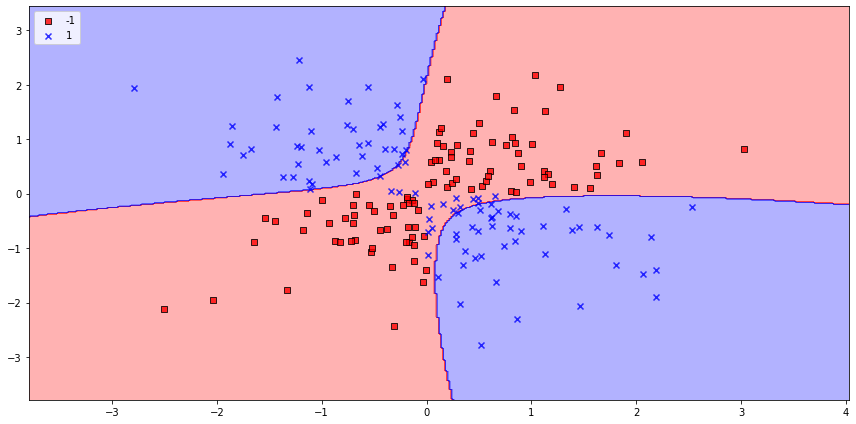

In [17]:
# Treinando o modelo
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0) # Substituímos o "linear" pelo 'rbf'

# Ajustando os dados
svm.fit(X_xor, y_xor)

plt.figure(figsize=(12,6))
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='justify'>Pelo visto, o resultado apresentado pelo kernel SVM foi muito bom. O parâmetro 𝛾, que definimos como gamma=0.1, pode ser entendido como um parâmetro de corte para a esfera gaussiana. Se aumentarmos o valor de 𝛾 , aumentamos a influência ou alcance dos exemplos de treinamento, o que leva a um limite de decisão <b>mais apertado e acidentado</b>. Para entender melhor 𝛾, vamos aplicar um SVM de kernel RBF ao nosso conjunto de dados de flores Iris:</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


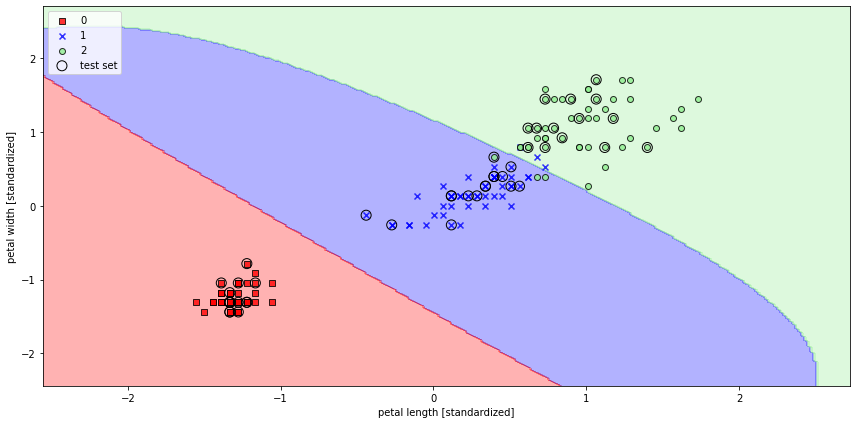

In [18]:
from sklearn.svm import SVC

# Treinando o modelo 
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0) # Alteramos os parâmetros gamma e C.
svm.fit(X_train_std, y_train) # Colocamos os valores para o Cj Dados Iris

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='justify'>Como escolhemos um valor relativamente pequeno para 𝛾 (gamma), o limite de decisão resultante do modelo SVM do kernel RBF será relativamente suave, conforme mostrado no gráfico acima.</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


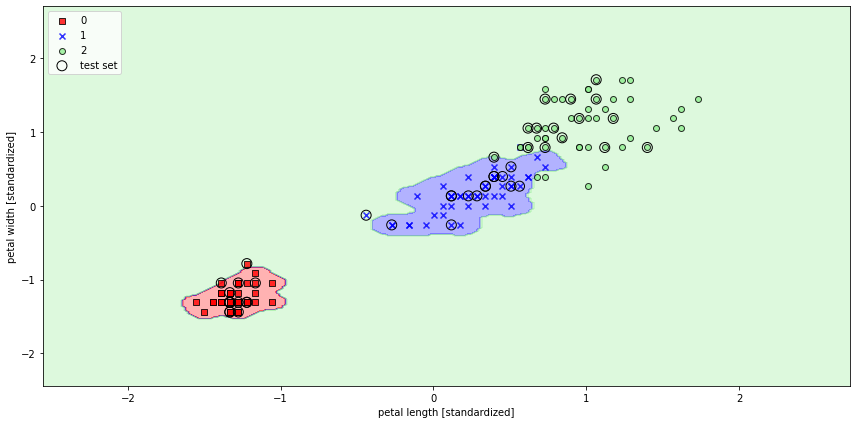

In [19]:
from sklearn.svm import SVC

# Treinando o modelo 
svm = SVC(kernel='rbf', random_state=1, gamma=100., C=1.0) # Alteramos os parâmetros gamma para um valor alto e C foi mantido.
svm.fit(X_train_std, y_train) # Colocamos os valores para o Cj Dados Iris

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='justify'>No gráfico resultante, podemos ver que o limite de decisão em torno das classes 0 e 1 é muito mais apertado usando um valor relativamente grande de 𝛾 (gamma).</p>

<p align='justify'>Embora o modelo se ajuste muito bem ao conjunto de dados de treinamento, esse classificador provavelmente terá um alto erro de generalização em dados não vistos, apresentando uma tendência de <i>overfitting</i>. Isso ilustra que o parâmetro 𝛾 também desempenha um papel importantíssimo no controle de <i>overfitting</i> ou variância quando o algoritmo é muito sensível às flutuações no conjunto de dados de treinamento.</p>

<h4>Aprendizagem da Árvore de Decisão (Decision tree)</h4>
<p align='justify'>Os classificadores de árvore de decisão são modelos atraentes se nos preocuparmos com a interpretabilidade. Como o nome "árvore de decisão" sugere, podemos pensar nesse modelo como quebrar nossos dados tomando uma decisão com base em uma série de perguntas.</p>
<p align='center'><img src=https://media-exp1.licdn.com/dms/image/C4E12AQF7jIPKgVnGQA/article-cover_image-shrink_720_1280/0/1534435317264?e=1654128000&v=beta&t=hSz0BZ8yrXz8ENPO-fug9UExW0XDBvVjtKTl0B3WrFU heigth=450 width=700></p>

<p align='justify'>Usando o algoritmo de decisão, começamos na raiz da árvore e dividimos os dados no recurso que resulta no maior <b>ganho de informação (IG)</b>, que será explicado com mais detalhes mais pra frente. Em um processo iterativo, podemos repetir esse procedimento de divisão em cada nó filho até que as folhas estejam puras. Isso significa que os exemplos de treinamento em cada nó pertencem à mesma classe. Na prática, isso pode resultar em uma árvore muito profunda com muitos nós, o que pode facilmente levar ao <i>overfitting</i>. Assim, normalmente queremos podar a árvore definindo um limite para a profundidade máxima da árvore.</p>

<h4>Maximizando o IG – obtendo o maior retorno possível</h4>
<p align='justify'>Para dividir os nós nas características mais informativas, precisamos definir uma função objetivo que queremos otimizar através do algoritmo de aprendizado em árvore. Aqui, nossa função objetivo é maximizar o IG em cada divisão.</p>
<p align='justify'>As três medidas de impureza ou critérios de divisão que são comumente usados em árvores de decisão binárias são impureza de Gini (𝐼𝐺), entropia (𝐼𝐻) e o erro de classificação (𝐼𝐸). Vamos começar com a definição de entropia para todas as classes não vazias (𝑝(𝑖|𝑡) ≠ 0 ). A entropia é, portanto, 0 se todos os exemplos em um nó pertencem à mesma classe e a entropia é máxima se tivermos uma distribuição de classes uniforme. Neste contexto,podemos dizer que o critério de entropia tenta maximizar a informação mútua na árvore.</p>

<p align='justify'>A impureza de Gini pode ser entendida como um critério para minimizar a probabilidade de erros de classificação. Semelhante à entropia, a impureza Gini é máxima se as classes estiverem perfeitamente misturadas, por exemplo, em uma configuração de classe binária (c = 2). No entanto, na prática, tanto a impureza de Gini quanto a entropia normalmente produzem resultados muito semelhantes, e geralmente não vale a pena gastar muito tempo avaliando árvores usando diferentes critérios de impureza, em vez de experimentar diferentes cortes de poda.</p>

<p align='justify'>Outra medida de impureza é o erro de classificação. Este é um critério útil para poda, mas não recomendado para o crescimento de uma árvore de decisão, pois é menos sensível a mudanças nas probabilidades de classe dos nós.</p>

<h4>Construindo uma árvore de decisão</h4>
<p align='justify'>As árvores de decisão podem construir limites de decisão complexos dividindo o espaço de características em retângulos. No entanto, devemos ter cuidado, pois quanto mais profunda a árvore de decisão, mais complexo o limite de decisão se torna, o que pode facilmente resultar em <i>overfitting</i>. Usando o <i>scikit-learn</i>, vamos agora treinar uma árvore de decisão com profundidade máxima de 4, usando a <i>impureza Gini</i> como critério de impureza. Embora o dimensionamento de recursos possa ser desejado para fins de visualização, observe que o dimensionamento de recursos não é um requisito para algoritmos de árvore de decisão.</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


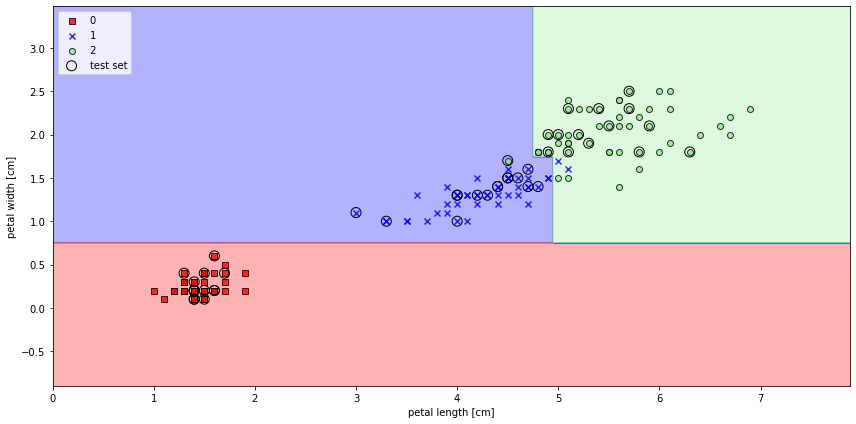

In [20]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini', 
                                    max_depth=4, 
                                    random_state=1)
tree_model.fit(X_train, y_train)

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Plotando os dados
plt.figure(figsize=(12,6))
plot_decision_regions(X_combined, y_combined, 
                      classifier=tree_model,
                      test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='jusitfy'>O <i>plot_tree</i> é um bom recurso do <i>scikit-learn</i> é que ele nos permite visualizar prontamente o modelo de árvore de decisão após o treinamento.</p>

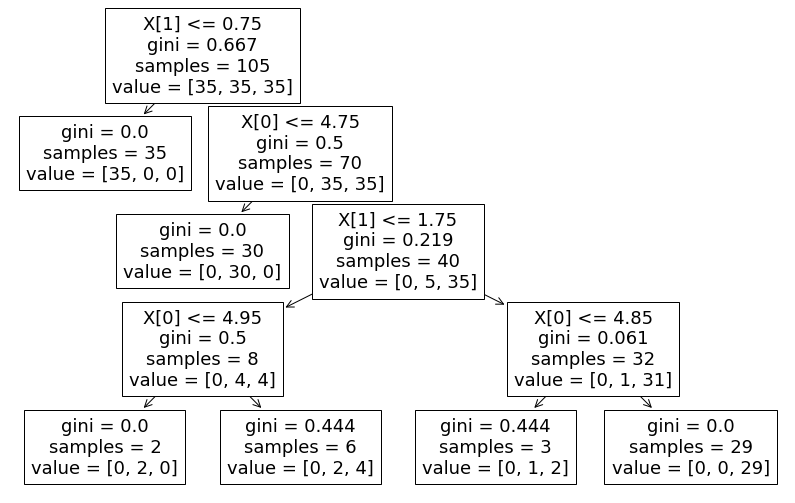

In [21]:
from sklearn import tree
plt.figure(figsize=(14,9))
tree.plot_tree(tree_model)
plt.show()

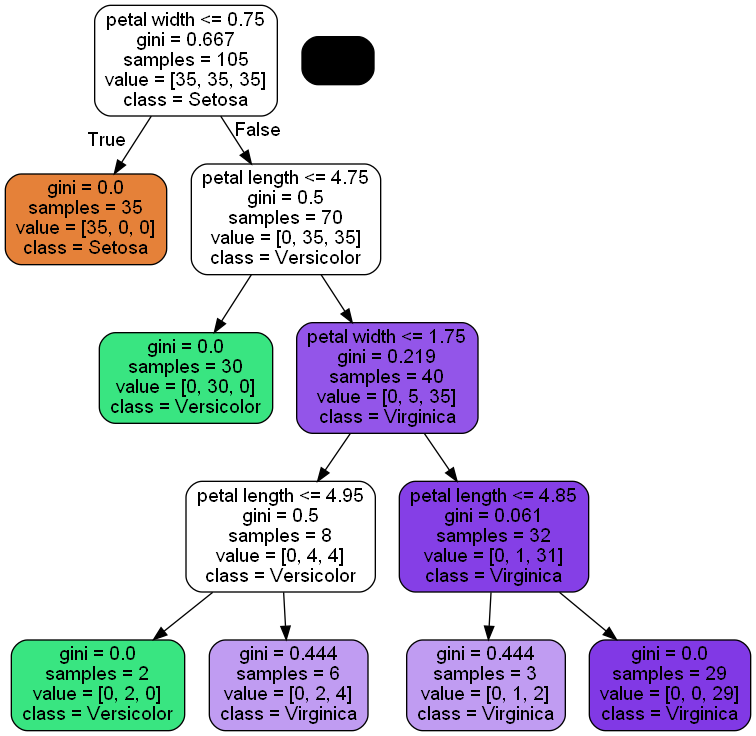

In [22]:
# Gerando uma visualização mais clara com o Graphviz

from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_data = export_graphviz(tree_model,
                           filled=True, 
                           rounded=True,
                           class_names=['Setosa', 
                                        'Versicolor',
                                        'Virginica'],
                           feature_names=['petal length', 
                                          'petal width'],
                           out_file=None) 
graph = graph_from_dot_data(dot_data) 
graph.write_png('tree.png')
Image(filename='tree.png', width=600) 

<h4>Combinando várias árvores de decisão por meio de florestas aleatórias</h4>
<p align='justify'>Os métodos ensemble ganharam enorme popularidade em aplicações de aprendizado de máquina durante a última década devido ao seu bom desempenho de classificação e robustez em relação ao <i>overfitting</i>. Embora abordaremos diferentes métodos de ensemble, incluindo <i>bagging</i> e o  <i>boosting</i> futuramente. Vamos discutir o algoritmo de floresta aleatória<i>(Random Forest)</i> baseado em árvore de decisão, conhecido por sua boa escalabilidade e facilidade de uso. Uma floresta aleatória pode ser considerada como um conjunto de árvores de decisão. A ideia por trás de uma floresta aleatória é calcular a média de várias árvores de decisão (profundas) que individualmente sofrem de alta variância para construir um modelo mais robusto que tenha um melhor desempenho de generalização e seja menos suscetível a <i>overfitting</i>. O algoritmo de floresta aleatória pode ser resumido em quatro etapas simples:
<ol>
<li>Desenhe uma amostra bootstrap aleatória de tamanho n (escolha aleatoriamente <i>n</i> exemplos do conjunto de dados de treinamento com substituição).</li>
<li>Crie uma árvore de decisão a partir da amostra bootstrap. Em cada nó:</li>
<ul>
<li>Selecione aleatoriamente <i>d</i> recursos sem substituição.</li>
<li>Divida o nó usando o recurso que fornece a melhor divisão de acordo com a função objetivo, por exemplo, maximizando o ganho de informação.</li>
</ul>
<li>Repita os passos 1-2 <i>k</i> vezes.</li>
<li>Agregue a previsão por cada árvore para atribuir o rótulo de classe por <b>maioria de votos</b>.</li>
</ol>


<p align='justify'>Devemos notar uma pequena modificação na etapa 2 quando estamos treinando as árvores de decisão individuais: em vez de avaliar todos os recursos para determinar a melhor divisão em cada nó, consideramos apenas um subconjunto aleatório deles.</p>
<p align='justify'>Embora as florestas aleatórias não ofereçam o mesmo nível de interpretabilidade que as árvores de decisão, uma grande vantagem das florestas aleatórias é que não precisamos nos preocupar tanto em escolher bons valores de hiperparâmetros. Normalmente, não precisamos podar a floresta aleatória, pois o modelo de conjunto é bastante robusto ao ruído das árvores de decisão individuais. O único parâmetro com o qual realmente precisamos nos preocupar na prática é o número de árvores, <i>k</i>, (etapa 3) que escolhemos para a floresta aleatória. Normalmente, quanto maior o número de árvores, melhor o desempenho do classificador de floresta aleatória às custas de um maior custo computacional.</p>
<p align='justify'>Embora seja menos comum na prática, outros hiperparâmetros do classificador de floresta aleatória que podem ser otimizados são o tamanho <i>n</i>, da amostra bootstrap (passo 1), e o número de características <i>d</i> que são escolhidas aleatoriamente para cada divisão (passo 2.a), respectivamente. Por meio do tamanho da amostra <i>n</i>, da amostra bootstrap, controlamos a compensação de viés-variância da floresta aleatória.</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


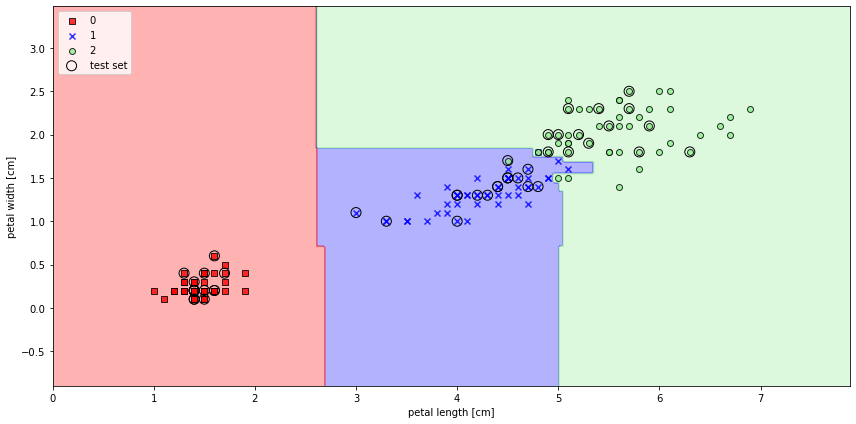

In [23]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)
forest.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_decision_regions(X_combined, y_combined, 
                      classifier=forest, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

<p align='justify'>Usando o código anterior, treinamos uma floresta aleatória a partir de 25 árvores de decisão por meio do parâmetro <i>n_estimators</i> e usamos a medida de <i>impureza Gini</i> como critério para dividir os nós. Embora estejamos desenvolvendo uma floresta aleatória muito pequena a partir de um conjunto de dados de treinamento muito pequeno, usamos o parâmetro <i>n_jobs</i> para fins de demonstração, o que nos permite paralelizar o treinamento do modelo usando vários núcleos do nosso computador (aqui, dois núcleos).</p>

<h4>K-vizinhos mais próximos (KNN) - um algoritmo de aprendizado preguiçoso</h4>

<p align='justify'>O último algoritmo de aprendizado supervisionado que queremos discutir neste capítulo é o classificador de k-vizinhos mais próximos (KNN), que é particularmente interessante porque é fundamentalmente diferente dos algoritmos de aprendizado que discutimos até agora.</p>
<p align='justify'>KNN é um exemplo típico de um aprendiz preguiçoso. Ele é chamado de "preguiçoso" não por causa de sua aparente simplicidade, mas porque não aprende uma função discriminativa dos dados de treinamento, mas memoriza o conjunto de dados de treinamento.</p>
<p align='justify'>O algoritmo KNN em si é bastante simples e pode ser resumido pelas seguintes etapas:</p>
<ol>
<li>Escolha o número de <i>k</i> e uma métrica de distância.</li>
<li>Encontre os <i>k</i> vizinhos mais próximos do registro de dados que queremos classificar.</li>
<li>Atribuir o rótulo de classe por maioria de votos.</li>
</ol>

<p align='justify'>Com base na métrica de distância escolhida, o algoritmo <i>KNN</i> encontra os <i>k</i> exemplos no conjunto de dados de treinamento que estão mais próximos (mais semelhantes) do ponto que queremos classificar. O rótulo de classe do ponto de dados é então determinado por uma votação majoritária entre seus <i>k</i> vizinhos mais próximos.</p>
<p align='justify'>A principal vantagem dessa abordagem baseada em memória é que o classificador se adapta imediatamente à medida que coletamos novos dados de treinamento. No entanto, a desvantagem é que a complexidade computacional para classificar novos exemplos cresce linearmente com o número de exemplos no conjunto de dados de treinamento no pior cenário – a menos que o conjunto de dados tenha muito poucas dimensões (recursos) e o algoritmo tenha sido implementado usando dados eficientes estruturas como árvores k-d. Além disso, não podemos descartar exemplos de treinamento, pois nenhuma etapa de treinamento está envolvida. Assim, o espaço de armazenamento pode se tornar um desafio se estivermos trabalhando com grandes conjuntos de dados.</p>

C:\Users\willi\AppData\Local\Temp\ipykernel_16616\2469344175.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


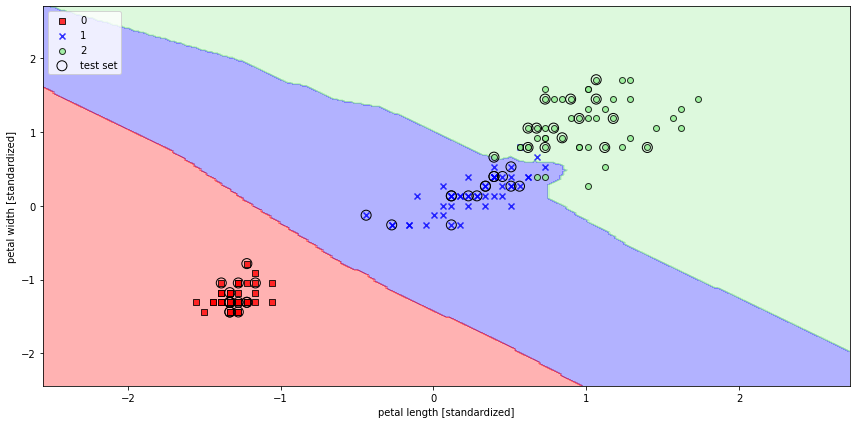

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, y_train)


plt.figure(figsize=(12,6))
plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(105, 150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()